# Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [48]:
import warnings
warnings.filterwarnings('ignore')
import numpy as nm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Task 3: Load in the Dataset in your Jupyter Notebook

0.4110442479509982
[0.01289878]


(0.0, 0.8953)

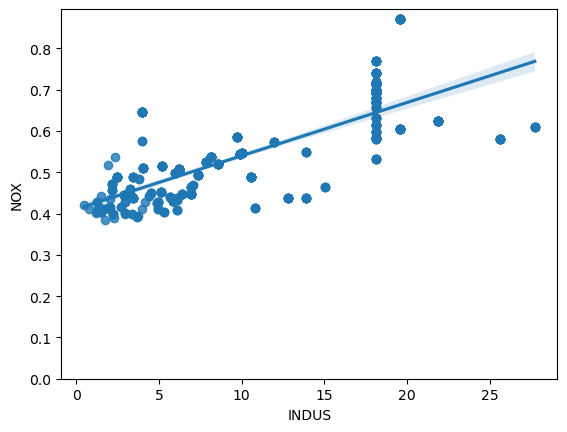

In [49]:
# Fetching the Data and converting the Data to a Dataframe for analysis purpose.
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

X = boston_df[['INDUS']]
Y = boston_df['NOX']

lm = LinearRegression()

lm.fit(X, Y)

print(lm.intercept_)
print(lm.coef_)

Y_hat = lm.predict(X)

Y_hat

sns.regplot(x = "INDUS", y = "NOX", data = boston_df)
plt.ylim(0,)

In [50]:
# Describe the info of the Dataset
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


# Task 4: Generate Descriptive Statistics and Visualizations

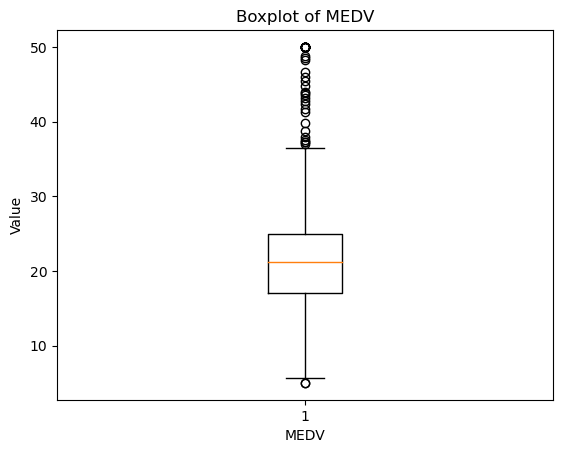

In [31]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create a boxplot
ax.boxplot(boston_df['MEDV'])

# Set the title and labels
ax.set_title('Boxplot of MEDV')
ax.set_xlabel('MEDV')
ax.set_ylabel('Value')

# Display the plot
plt.show()

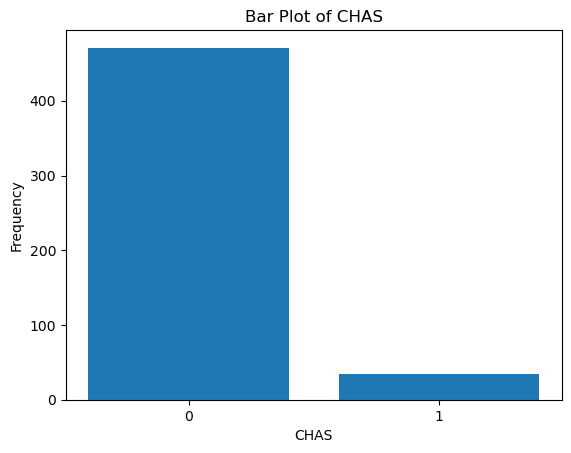

In [32]:
# Count the occurrences of each value in the CHAS column
chas_counts = boston_df['CHAS'].value_counts()

# Create a bar plot
plt.bar(chas_counts.index, chas_counts.values)

# Set the title and labels
plt.title('Bar Plot of CHAS')
plt.xlabel('CHAS')
plt.ylabel('Frequency')

# Set the x-axis tick labels
plt.xticks(chas_counts.index, ['0', '1'])  # Assuming '0' means not bound by the river and '1' means bound by the river

# Display the plot
plt.show()

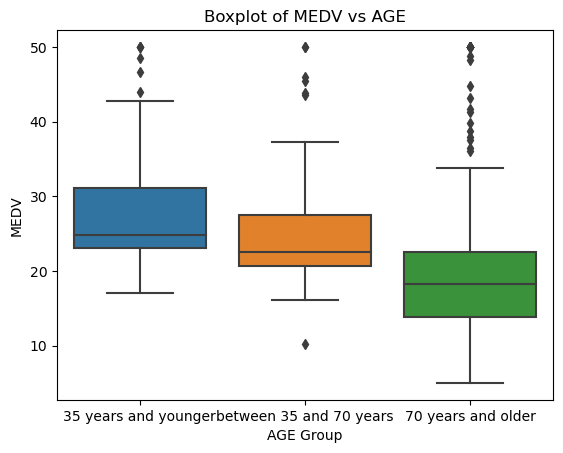

In [33]:
# Discretize the AGE variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Create a boxplot
sns.boxplot(data=boston_df, x='AGE_group', y='MEDV')

# Set the title and labels
plt.title('Boxplot of MEDV vs AGE')
plt.xlabel('AGE Group')
plt.ylabel('MEDV')

# Display the plot
plt.show()

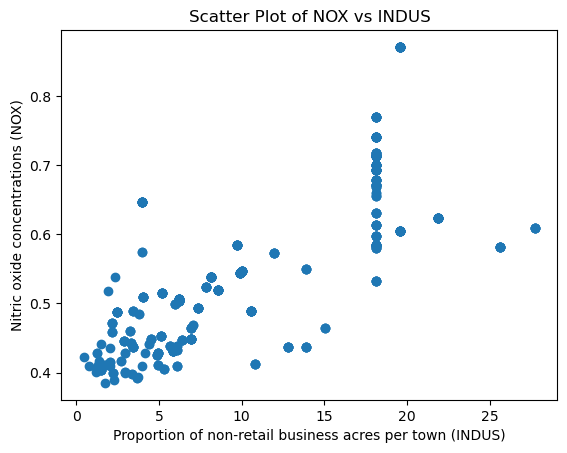

In [34]:
# Create a scatter plot
plt.scatter(boston_df['INDUS'], boston_df['NOX'])

# Set the title and labels
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of non-retail business acres per town (INDUS)')
plt.ylabel('Nitric oxide concentrations (NOX)')

# Display the plot
plt.show()

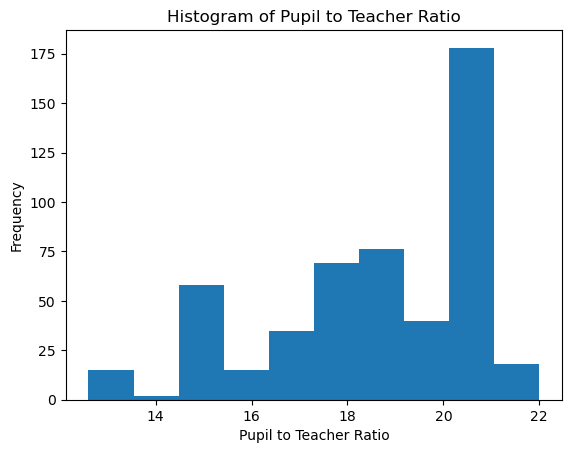

In [35]:
# Create a histogram
plt.hist(boston_df['PTRATIO'], bins=10)

# Set the title and labels
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Task 5: Use the appropriate tests to answer the questions provided.

In [36]:
import scipy.stats as stats

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [37]:
# Extract the median values for houses bounded and not bounded by the Charles river
bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(bounded, not_bounded)

#defining alpha value
alpha=0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Compare the p-value with the significance level
if p_value < alpha:
    print("There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by the river.")
else:
    print("There is no significant difference in the median value of houses bounded by the Charles river and those not bounded by the river.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by the river.


Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [38]:
# Create groups based on the levels of the 'AGE' variable
group1 = boston_df[boston_df['AGE'] < 35]['MEDV']
group2 = boston_df[(boston_df['AGE'] >= 35) & (boston_df['AGE'] < 70)]['MEDV']
group3 = boston_df[boston_df['AGE'] >= 70]['MEDV']


# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(bounded, not_bounded)

#defining alpha value
alpha=0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Compare the p-value with the significance level
if p_value < alpha:
    print("There is a significant difference in the median value of houses for each proportion of owner occupied units built prior to 1940 ")
else:
    print("There is no significant difference in the median value of houses for each proportion of owner occupied units built prior to 1940 ")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
There is a significant difference in the median value of houses for each proportion of owner occupied units built prior to 1940 


Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

In [40]:
# Create a DataFrame with 'NOX' and 'INDUS' variables
boston_df = pd.DataFrame({
    'NOX': [0.538, 0.469, 0.469, 0.458, 0.458],
    'INDUS': [2.31, 7.07, 7.07, 2.18, 2.18]
})

# Calculate the Pearson correlation coefficient
correlation_coefficient = boston_df['NOX'].corr(boston_df['INDUS'], method='pearson')

#defining alpha value
alpha=0.05

# Print the correlation coefficient
print("Pearson correlation coefficient:", correlation_coefficient)


# Compare the p-value with the significance level
if p_value < alpha:
    print("There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
else:
    print("There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")

Pearson correlation coefficient: -0.23473045985045934
There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [51]:
import statsmodels.api as sm
## X is the input variables (or independent variables)
X = boston_df['DIS']

## y is the target/dependent variable
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        17:21:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient is positive 0.0572 which also signifies that the impact increases by 0.0572 when there is an additional weighted distance to the five Boston employment centres 